<a href="https://colab.research.google.com/github/21cs076/Real-Time-Landslide-Detection-and-Buried-Vehicle-Identification-using-YOLOv8/blob/main/train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 904.4/904.4 kB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.0 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 5.59M/5.59M [00:00<00:00, 113MB/s]


100%|██████████| 134k/134k [00:00<00:00, 6.69MB/s]


image 1/1 /content/bus.jpg: 640x480 4 persons, 1 bus, 362.0ms
Speed: 15.8ms preprocess, 362.0ms inference, 3.5ms postprocess per image at shape (1, 3, 640, 480)


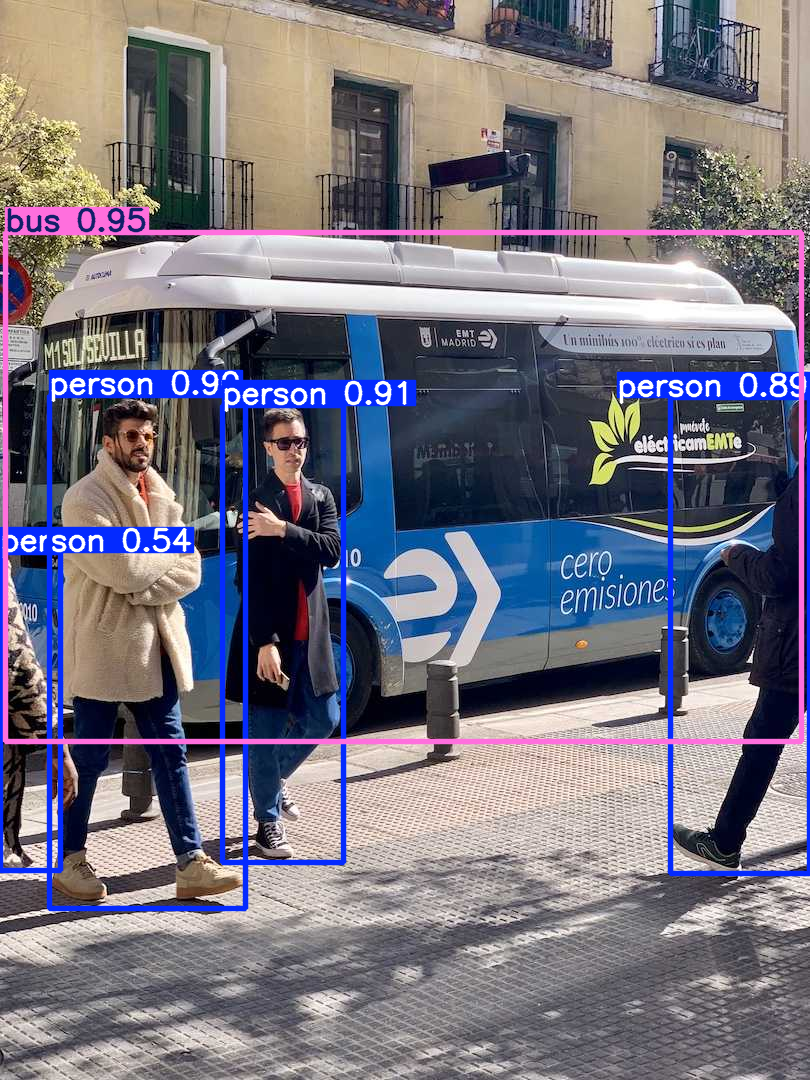

In [2]:
!pip install ultralytics
!pip install roboflow
!pip install pytorch-lightning

from ultralytics import YOLO

# Load YOLOv8 model
model = YOLO('yolov10n.pt')

# Perform inference on an image from Google Drive
results = model('https://ultralytics.com/images/bus.jpg')

# Iterate through the results and display each
for result in results:
    result.show()

In [16]:
!pip install pytorch-lightning

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.3/819.3 kB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 927.3/927.3 kB 40.2 MB/s eta 0:00:00


In [3]:
from roboflow import Roboflow
rf = Roboflow(api_key="4MptKsSsONT0fnQsIDc2")
project = rf.workspace("deslizamentos").project("landslide-detection-augmentation")
version = project.version(12)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Landslide-Detection-Augmentation-12 in yolov8:: 100%|██████████| 2738/2738 [00:06<00:00, 415.85it/s]


In [24]:
from ultralytics import YOLO
from pytorch_lightning.callbacks import EarlyStopping
import pytorch_lightning as pl

# Load a pre-trained YOLOv8 model
model = YOLO("yolov8n.pt")

# Use early stopping in your training process
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=True)

# Train the model with early stopping and specified parameters
model.train(
    data="/content/Landslide-Detection-Augmentation-12/data.yaml",
    epochs=150,
    batch=16,
    imgsz=640,
    project="runs/train",
    name="landslide_detection",
    exist_ok=True,
    callbacks=[early_stopping]
)

# Save the model weights
model.save("/content/Landslide-Detection-Augmentation-12/best10.pt")

SyntaxError: '[31m[1mcallbacks[0m' is not a valid YOLO argument. 

    Arguments received: ['yolo', '-f', '/root/.local/share/jupyter/runtime/kernel-e775246a-df9d-4e3e-aa41-16615db4d978.json']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of {'classify', 'segment', 'detect', 'pose', 'obb'}
                MODE (required) is one of {'track', 'benchmark', 'train', 'export', 'predict', 'val'}
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
                    See all ARGS at https://docs.ultralytics.com/usage/cfg or with 'yolo cfg'

    1. Train a detection model for 10 epochs with an initial learning_rate of 0.01
        yolo train data=coco8.yaml model=yolo11n.pt epochs=10 lr0=0.01

    2. Predict a YouTube video using a pretrained segmentation model at image size 320:
        yolo predict model=yolo11n-seg.pt source='https://youtu.be/LNwODJXcvt4' imgsz=320

    3. Val a pretrained detection model at batch-size 1 and image size 640:
        yolo val model=yolo11n.pt data=coco8.yaml batch=1 imgsz=640

    4. Export a YOLO11n classification model to ONNX format at image size 224 by 128 (no TASK required)
        yolo export model=yolo11n-cls.pt format=onnx imgsz=224,128

    5. Ultralytics solutions usage
        yolo solutions count or in ['heatmap', 'queue', 'speed', 'workout', 'analytics', 'trackzone', 'inference'] source="path/to/video/file.mp4"

    6. Run special commands:
        yolo help
        yolo checks
        yolo version
        yolo settings
        yolo copy-cfg
        yolo cfg
        yolo solutions help

    Docs: https://docs.ultralytics.com
    Solutions: https://docs.ultralytics.com/solutions/
    Community: https://community.ultralytics.com
    GitHub: https://github.com/ultralytics/ultralytics
     (<string>)

In [4]:
from google.colab import files
uploaded = files.upload()

import os
os.listdir('/content')

Saving best.pt to best.pt


['.config',
 'Landslide-Detection-Augmentation-12',
 'bus.jpg',
 'yolov10n.pt',
 'best.pt',
 'sample_data']

In [23]:
from ultralytics import YOLO

# Load the trained YOLO model
model = YOLO("/content/best.pt")
# Evaluate the model using the val() method
metrics = model.val(data="/content/Landslide-Detection-Augmentation-12/data.yaml", task="detect")

# Print evaluation metrics
print(f"mAP: {metrics.box.maps}")
print(f"mAP50: {metrics.box.map50}")
print(f"mAP75: {metrics.box.map75}")  # mAP at IoU thresholds of 50% (mAP50) and 75% (mAP75)

Ultralytics 8.3.56 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv10n summary (fused): 285 layers, 2,695,196 parameters, 0 gradients, 8.2 GFLOPs


val: Scanning /content/Landslide-Detection-Augmentation-12/valid/labels.cache... 115 images, 37 backgrounds, 0 corrupt: 100%|██████████| 115/115 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:24<00:00,  3.05s/it]


                   all        115        162      0.649      0.415      0.445      0.205
               Fissure         29         60      0.558       0.35      0.378      0.179
             Landslide         61        102      0.741       0.48      0.513      0.231
Speed: 2.4ms preprocess, 182.7ms inference, 0.0ms loss, 0.1ms postprocess per image
Results saved to runs/detect/val6
mAP: [    0.17895     0.23135]
mAP50: 0.44538361500741763
mAP75: 0.1626047778303505


In [15]:
!pip install onnx
!pip install onnxruntime-gpu

import torch
import onnxruntime as ort
import numpy as np

# Convert to ONNX format
onnx_model_path = "/content/Landslide-Detection-Augmentation-12/lsmodel.onnx"
torch.onnx.export(
    model.model,
    torch.randn(1, 3, 640, 640),
    onnx_model_path,
    opset_version=11,
    input_names=["input"],
    output_names=["output"]
)

print(f"Model has been converted to ONNX format and saved at: {onnx_model_path}")

# Load and run inference using ONNX model
onnx_session = ort.InferenceSession(onnx_model_path)
outputs = onnx_session.run(None, {'input': np.random.rand(1, 3, 640, 640).astype(np.float32)})

print(outputs)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 75.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 291.5/291.5 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 7.4 MB/s eta 0:00:00


Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
Iterating over a tensor might cause the trace to be incorrect. Passing a tensor of different shape won't change the number of iterations executed (and might lead to errors or silently give incorrect results).
Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
Exporting aten::index operator of advance

Model has been converted to ONNX format and saved at: /content/Landslide-Detection-Augmentation-12/lsmodel.onnx
[array([[[     84.996,    -0.28111,      143.73,      8.1105,   0.0053632,           1],
        [     93.634,    -0.25846,      148.25,      7.8431,   0.0051538,           1],
        [     111.28,    -0.25274,       166.3,      7.5232,   0.0046819,           0],
        ...,
        [   -0.12922,      457.18,      6.0197,      493.08,  6.6221e-05,           1],
        [     632.96,      51.634,      639.98,      83.691,  6.6221e-05,           1],
        [   -0.20812,      603.16,      4.9848,       624.1,  6.6102e-05,           1]]], dtype=float32), array([[[[       4.38,      1.9098,    -0.01159, ...,     0.50854,     0.69243,     0.92713],
         [       4.57,     0.26902,     -2.8815, ...,      -3.777,     -2.0616,    -0.07161],
         [     5.6914,     0.95545,     -1.6811, ...,     -1.9805,   -0.023605,      3.1396],
         ...,
         [     5.9277,     0.931

In [ ]:
# Clone YOLOv8 repository
!git clone https://github.com/ultralytics/ultralytics.git
%cd ultralytics
